In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
df['Quantity'] = df['Quantity'].astype(float)

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year.astype(float)
df['Month'] = df['InvoiceDate'].dt.month.astype(float)
df['Day'] = df['InvoiceDate'].dt.day.astype(float)

In [9]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,1.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,12.0,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0


In [10]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True).replace({True: 1, False:0})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     406829 non-null  object        
 1   StockCode                     406829 non-null  object        
 2   Description                   406829 non-null  object        
 3   Quantity                      406829 non-null  float64       
 4   InvoiceDate                   406829 non-null  datetime64[ns]
 5   UnitPrice                     406829 non-null  float64       
 6   CustomerID                    406829 non-null  float64       
 7   Year                          406829 non-null  float64       
 8   Month                         406829 non-null  float64       
 9   Day                           406829 non-null  float64       
 10  Country_Austria               406829 non-null  int64         
 11  Country_Bahrain   

In [12]:
country_columns = [col for col in df.columns if col.startswith('Country_')]
country_counts = df[country_columns].sum().sort_values(ascending=False)
print(country_counts)

Country_United Kingdom          361878
Country_Germany                   9495
Country_France                    8491
Country_EIRE                      7485
Country_Spain                     2533
Country_Netherlands               2371
Country_Belgium                   2069
Country_Switzerland               1877
Country_Portugal                  1480
Country_Norway                    1086
Country_Italy                      803
Country_Channel Islands            758
Country_Finland                    695
Country_Cyprus                     622
Country_Sweden                     462
Country_Austria                    401
Country_Denmark                    389
Country_Japan                      358
Country_Poland                     341
Country_USA                        291
Country_Israel                     250
Country_Unspecified                244
Country_Singapore                  229
Country_Iceland                    182
Country_Canada                     151
Country_Greece           

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,2010.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,2010.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,2010.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,2010.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,2010.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     406829 non-null  object        
 1   StockCode                     406829 non-null  object        
 2   Description                   406829 non-null  object        
 3   Quantity                      406829 non-null  float64       
 4   InvoiceDate                   406829 non-null  datetime64[ns]
 5   UnitPrice                     406829 non-null  float64       
 6   CustomerID                    406829 non-null  float64       
 7   Year                          406829 non-null  float64       
 8   Month                         406829 non-null  float64       
 9   Day                           406829 non-null  float64       
 10  Country_Austria               406829 non-null  int64         
 11  Country_Bahrain   

In [16]:
# Start EDA

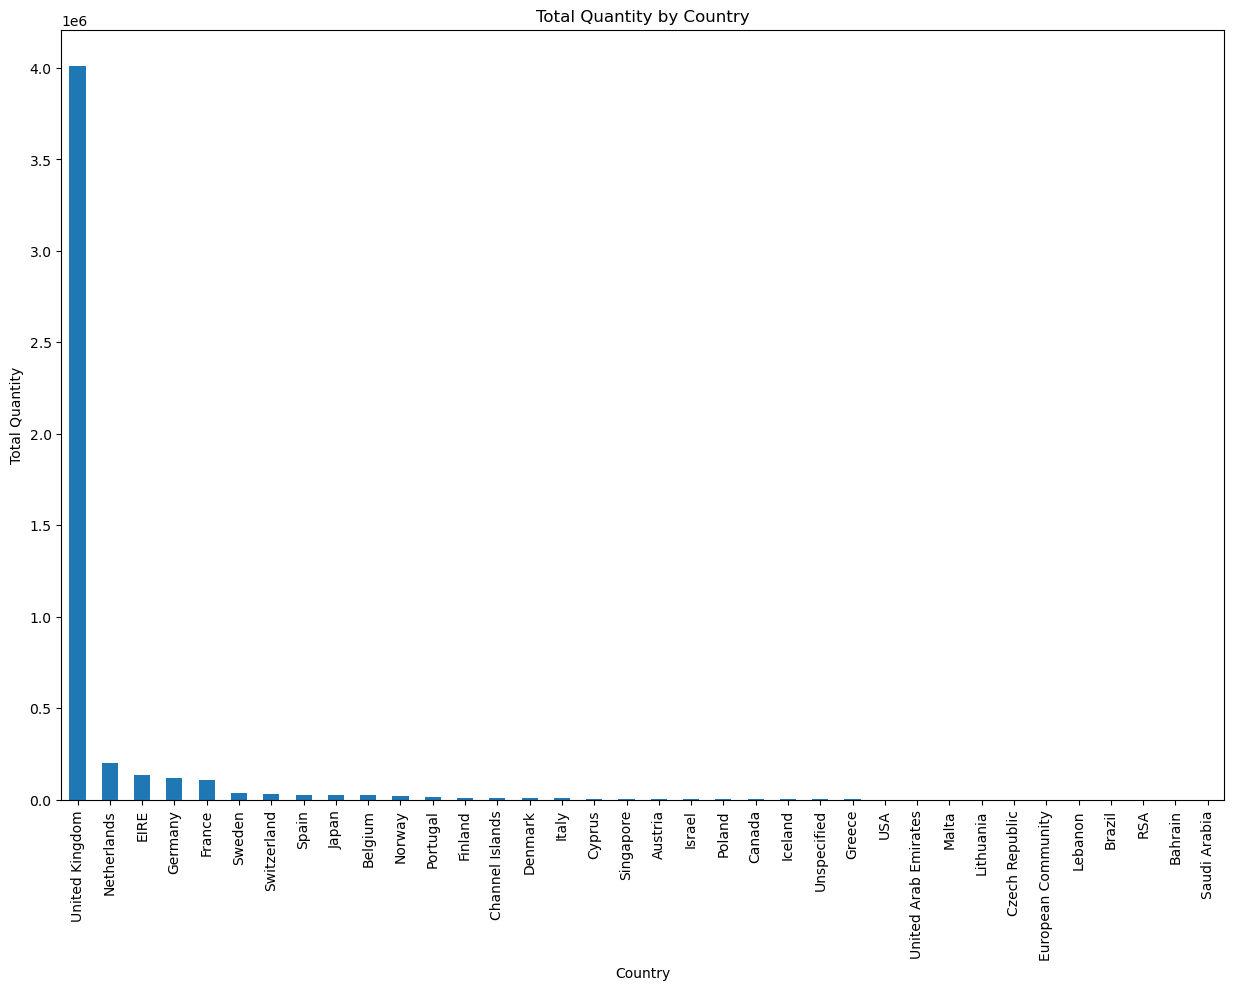

In [17]:
country_quantities = pd.DataFrame()

for country_col in [col for col in df.columns if col.startswith('Country_')]:
    country_name = country_col.split('_')[1]  # Extract the country name from the column
    country_quantities[country_name] = df[country_col] * df['Quantity']

country_totals = country_quantities.sum().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
country_totals.plot(kind='bar')
plt.title('Total Quantity by Country')
plt.ylabel('Total Quantity')
plt.xlabel('Country')
plt.xticks(rotation=90) 
plt.show()

#conclustion: United Kingdom has the most total quantities

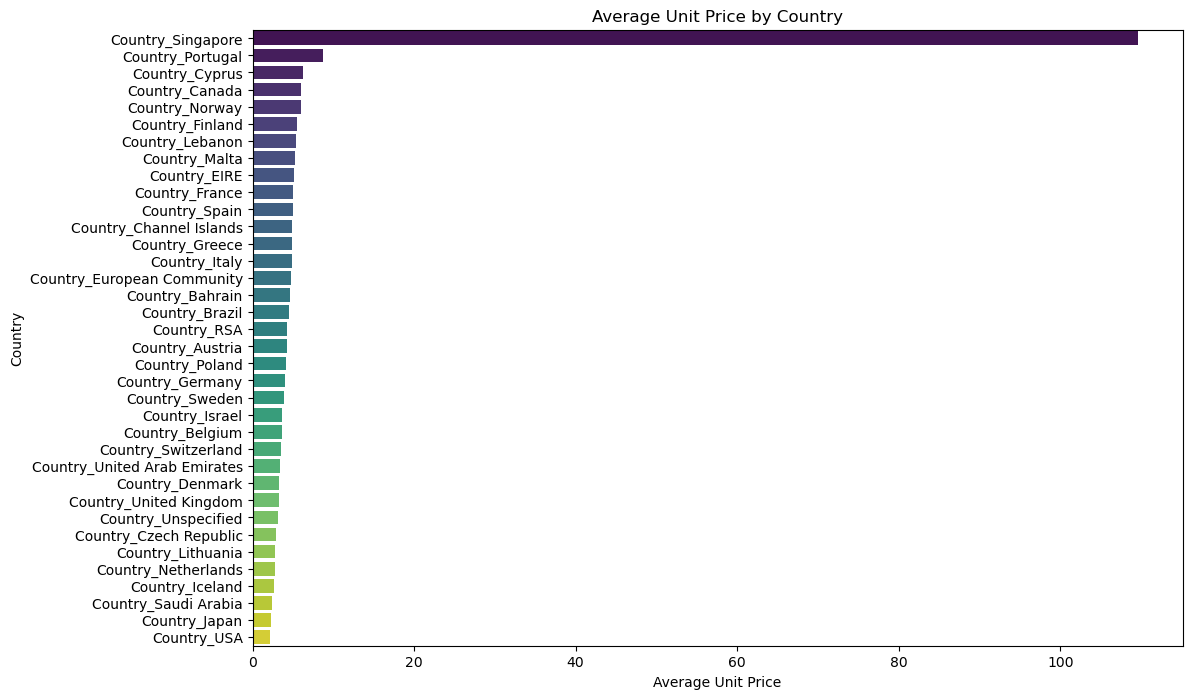

In [18]:
country_columns = [col for col in df.columns if col.startswith('Country_')]

average_unit_price_by_country = {country: (df[country] * df['UnitPrice']).sum() / df[country].sum() for country in country_columns}

average_unit_price_df = pd.DataFrame(list(average_unit_price_by_country.items()), columns=['Country', 'AverageUnitPrice'])

average_unit_price_df = average_unit_price_df.sort_values('AverageUnitPrice', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='AverageUnitPrice', y='Country', data=average_unit_price_df, palette='viridis')
plt.title('Average Unit Price by Country')
plt.xlabel('Average Unit Price')
plt.ylabel('Country')
plt.show()
# Conclusion: Singapore has the heighst average unit price

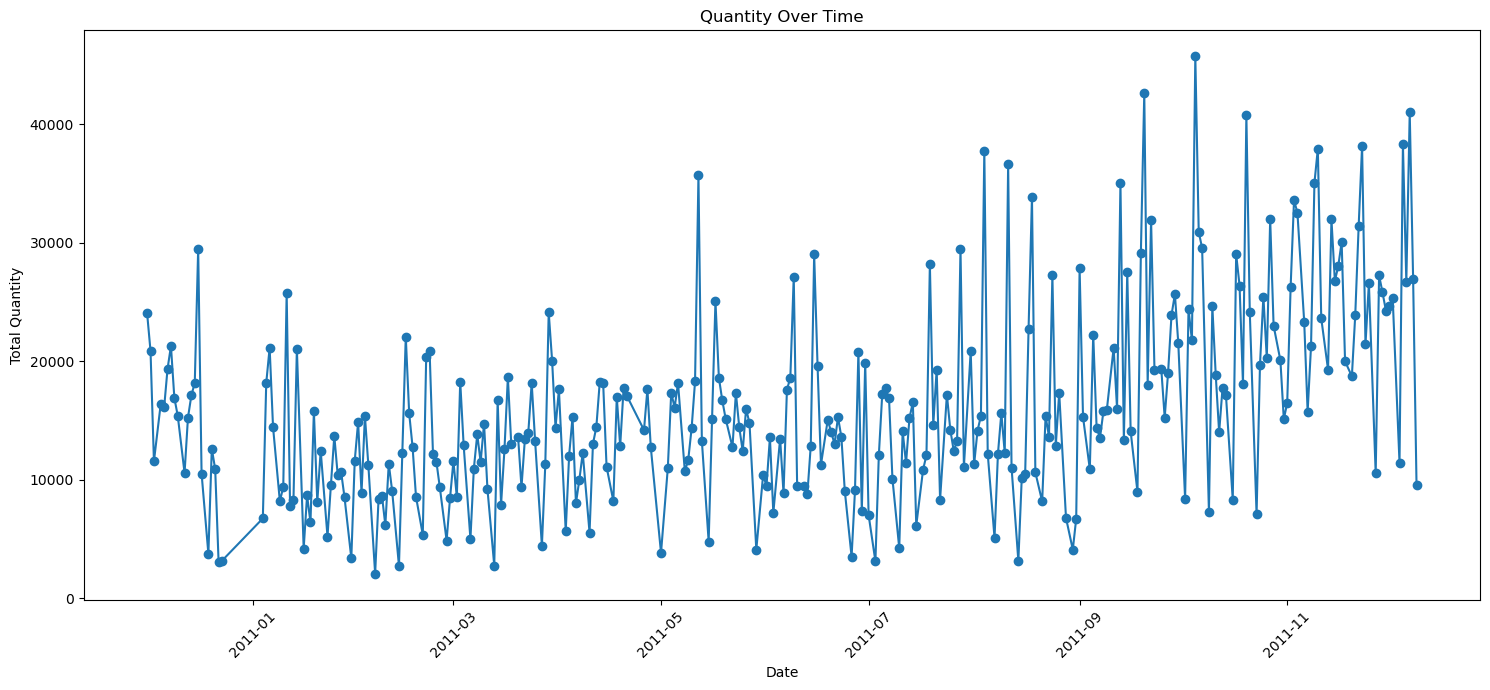

In [19]:

quantity_over_time = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()

quantity_over_time.columns = ['Date', 'Total Quantity']

plt.figure(figsize=(15, 7))
plt.plot(quantity_over_time['Date'], quantity_over_time['Total Quantity'], marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


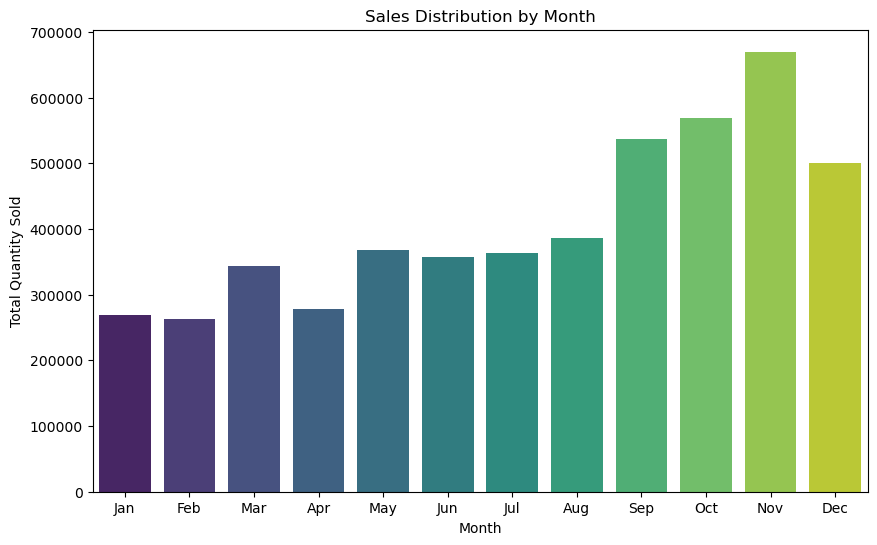

In [20]:
monthly_sales = df.groupby('Month')['Quantity'].sum().reset_index()

monthly_sales.sort_values('Month', inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Quantity', data=monthly_sales, palette='viridis')

plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Distribution by Month')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=monthly_sales['Month'] - 1, labels=month_names)  # Subtract 1 because month indexing starts from 0 in the ticks

plt.show()
# Conclusion: Novamber has the heighst quantity sold

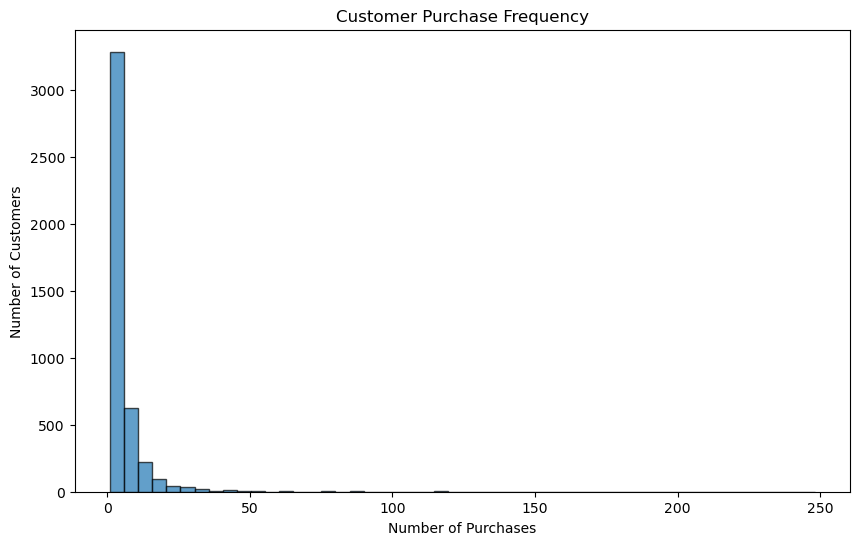

In [21]:
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 6))
purchase_frequency.hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(False)
plt.show()

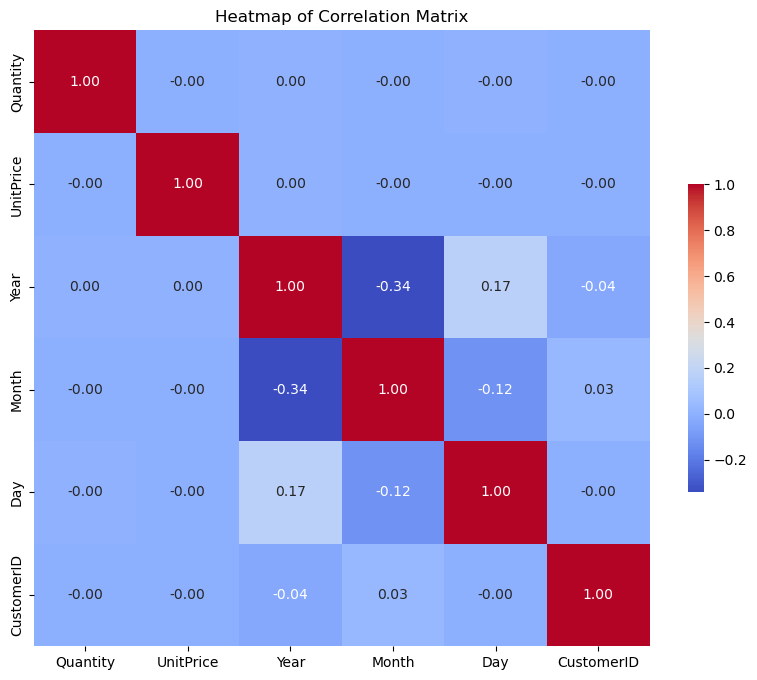

In [22]:
numeric_cols = ['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'CustomerID']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

plt.title('Heatmap of Correlation Matrix')

plt.show()
# Conclusion: Quantity and UnitPrice seem to have no significant correlation with the year

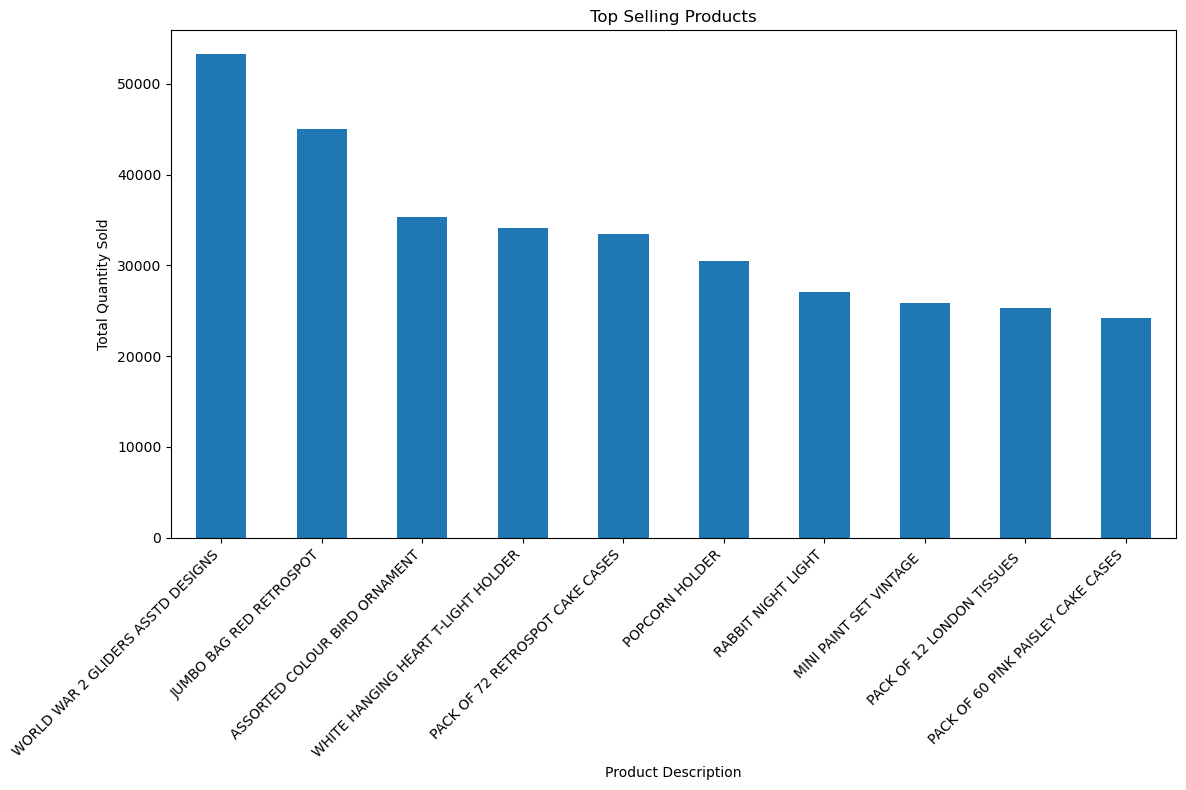

In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
top_products = top_products.head(top_n)

plt.figure(figsize=(12, 8))
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
# Conclusion: Item World War 2 Glidera ASSTD Designs is the best seller

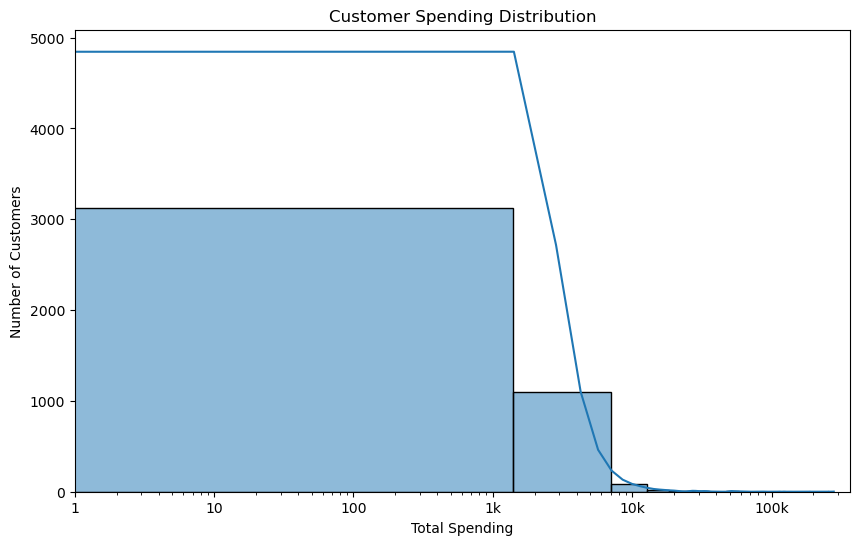

In [24]:
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

customer_spending = df.groupby('CustomerID')['TotalSpending'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['TotalSpending'], bins=50, kde=True)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')

plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000, 100000], ['1', '10', '100', '1k', '10k', '100k'])
plt.show()
# Conclusion: Relation shows that when spendindgs increase, number of customers decrease

In [25]:
# Start Feature Engineering

In [26]:
# 1. Country-based Features
# Since the United Kingdom has the most total quantities and Singapore has the highest average unit price, it may be useful to create features that capture these country-specific trends.
df['is_uk'] = df['Country_United Kingdom']
df['is_singapore'] = df['Country_Singapore']

In [27]:
# 2. Time-based Features
# November shows the highest quantity sold, which might be indicative of seasonal trends. Capture this by creating binary features for November or features that capture seasonality more broadly.
df['is_november'] = (df['Month'] == 11).astype(int)
df['season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)

In [28]:
#3. Product Popularity
# Given that "Item World War 2 Gliders ASSTD Designs" is the best seller, A feature indicating if the purchased item is this top-selling product.
df['is_best_seller'] = (df['Description'] == 'World War 2 Gliders ASSTD Designs').astype(int)

In [29]:
# 4. Spending vs. Customer Behavior
# The relationship that shows increased spending correlating with a decrease in the number of customers could be captured in a feature that represents the spending level.
high_spending_threshold = df['TotalSpending'].quantile(0.75)
df['is_high_spending'] = (df['TotalSpending'] >= high_spending_threshold).astype(int)

In [30]:
# 5. Ratios and Relative Features
# Consider creating features that are ratios or relative measures to capture the relationship between spending and customer count.

average_spending = df['TotalSpending'].mean()
df['spending_ratio'] = df['TotalSpending'] / average_spending

average_quantity = df['Quantity'].mean()
df['quantity_ratio'] = df['Quantity'] / average_quantity

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     406829 non-null  object        
 1   StockCode                     406829 non-null  object        
 2   Description                   406829 non-null  object        
 3   Quantity                      406829 non-null  float64       
 4   InvoiceDate                   406829 non-null  datetime64[ns]
 5   UnitPrice                     406829 non-null  float64       
 6   CustomerID                    406829 non-null  float64       
 7   Year                          406829 non-null  float64       
 8   Month                         406829 non-null  float64       
 9   Day                           406829 non-null  float64       
 10  Country_Austria               406829 non-null  int64         
 11  Country_Bahrain   

In [32]:
# Start Neural Network Processing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X = df.drop(['TotalSpending'],axis=1)
y = df['TotalSpending'].values.reshape(-1, 1)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [36]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (284780, 54)
y_train shape (284780, 1)
X_test shape (122049, 54)
y_test shape (122049, 1)


In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [38]:
# Scale the Features

In [39]:
numeric_cols = ['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'CustomerID']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train[numeric_cols])
X_test_s = scaler.transform(X_test[numeric_cols])

In [40]:
# Define the model

In [41]:
model = Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=(X_train_s.shape[1],)),
    layers.Dense(1,activation='linear')
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# compile the model

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
# Train the model

In [46]:
model.fit(X_train_s, y_train, validation_data=(X_test_s,y_test), epochs=20)

Epoch 1/20
8900/8900 [==============================] - 53s 6ms/step - loss: 137226.2500 - val_loss: 288379.7812
Epoch 2/20
8900/8900 [==============================] - 63s 7ms/step - loss: 136690.4219 - val_loss: 287648.7812
Epoch 3/20
8900/8900 [==============================] - 47s 5ms/step - loss: 136293.2969 - val_loss: 287140.5625
Epoch 4/20
8900/8900 [==============================] - 51s 6ms/step - loss: 136098.8125 - val_loss: 286842.5938
Epoch 5/20
8900/8900 [==============================] - 46s 5ms/step - loss: 135979.5312 - val_loss: 286644.7812
Epoch 6/20
8900/8900 [==============================] - 54s 6ms/step - loss: 135901.5469 - val_loss: 286447.1250
Epoch 7/20
8900/8900 [==============================] - 45s 5ms/step - loss: 135874.2500 - val_loss: 286315.2500
Epoch 8/20
8900/8900 [==============================] - 62s 7ms/step - loss: 135777.1094 - val_loss: 286153.4062
Epoch 9/20
8900/8900 [==============================] - 57s 6ms/step - loss: 135710.0938 - val_l

In [47]:
preds = model.predict(X_test_s).reshape(-1,)

3815/3815 [==============================] - 12s 3ms/step


In [48]:
y_test_f = y_test.flatten()
preds_f = preds.flatten()
res = pd.DataFrame({
    'Actual': y_test_f,
    'Predicted': preds_f
})
res

,Actual,Predicted
0,16.50,25.073511
1,16.50,15.385723
2,15.00,13.246922
3,4.95,15.614723
4,1.95,-0.840199
...,...,...
122044,0.42,-4.968680
122045,6.75,19.664282
122046,45.00,48.603600
122047,25.20,22.141787


In [49]:
# Calculate quantiles for TotalSpending
quantiles = df['TotalSpending'].quantile([0.25, 0.75])

def categorize_spending(row, quantiles):
    if row <= quantiles.iloc[0]:
        return 'Low'
    elif row > quantiles.iloc[0] and row < quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'High'

df['Spending_Level'] = df['TotalSpending'].apply(categorize_spending, quantiles=quantiles)


In [50]:
df['Spending_Level'].value_counts()
# Average spending was in Medium Level

Spending_Level
Medium    200987
High      102931
Low       102911
Name: count, dtype: int64

In [51]:
# Since the most spending was in Singapore and UK

In [52]:
# Let's geographic these segmentaions

In [53]:
df['is_other_countries'] = (~(df['is_uk'] | df['is_singapore'])).astype(int)

In [54]:
avg_spending_uk = df[df['is_uk'] == 1]['TotalSpending'].mean()
avg_spending_singapore = df[df['is_singapore'] == 1]['TotalSpending'].mean()

In [55]:
print("Average Spending in the UK: ", avg_spending_uk)
print("Average Spending in Singapore: ", avg_spending_singapore)

Average Spending in the UK:  18.702085769237144
Average Spending in Singapore:  39.82703056768559
